In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
from tensorflow import keras

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8840 - loss: 0.4055
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9680 - loss: 0.1043
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9785 - loss: 0.0702
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9831 - loss: 0.0525
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9879 - loss: 0.0366
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9719 - loss: 0.1000
Test accuracy: 0.9763000011444092
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first test image: 7


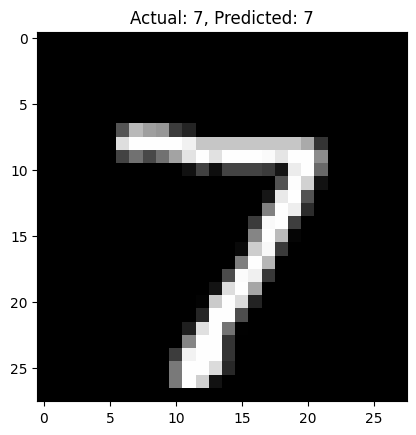

In [4]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
x_train=x_train/255
x_test=x_test/255

x_train_flat=x_train.reshape(-1,784)
x_test_flat=x_test.reshape(-1,784)

model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(x_train_flat, y_train, epochs=5)


test_loss, test_accuracy = model.evaluate(x_test_flat, y_test)
print("Test accuracy:", test_accuracy)


predictions = model.predict(x_test_flat)
predicted_label = np.argmax(predictions[0])
print("Predicted label for first test image:", predicted_label)


plt.imshow(x_test[0], cmap='gray')
plt.title(f"Actual: {y_test[0]}, Predicted: {predicted_label}")
plt.show()